## Imports

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, f_classif, RFE, RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Data Checking

In [2]:
data = pd.read_csv('breast_cancer.csv')
df = data.copy()

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
target = (df['diagnosis'] == 'M').astype(int)
target.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [7]:
li = ['Unnamed: 32','id','diagnosis']
df = df.drop(li, axis = 1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.nunique()

radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Train Test Split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

## Feature Selection

In [11]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [12]:
x_train_df = pd.DataFrame(x_train_std, index=x_train.index, columns=x_train.columns)
x_test_df = pd.DataFrame(x_test_std, index=x_test.index, columns=x_test.columns)

### 1. Using Tree Based Classifier(Random Forest)

In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_df, y_train)
feature_importances = rf.feature_importances_
selected_features_rf = x_train_df.columns[feature_importances > 0.02]

In [14]:
print("Number of Features Selected: ",len(selected_features_rf))
print(selected_features_rf)

Number of Features Selected:  14
Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


### 2. Using Recursive Feature Elimination

In [15]:
estimator = LogisticRegression(max_iter=1000)
rfe = RFE(estimator, n_features_to_select=15)
x_train_rfe = rfe.fit_transform(x_train_df, y_train)
selected_features_rfe = x_train_df.columns[rfe.support_]

In [16]:
print("Number of Features Selected: ",len(selected_features_rfe))
print(selected_features_rfe)

Number of Features Selected:  15
Index(['radius_mean', 'area_mean', 'concave points_mean', 'radius_se',
       'perimeter_se', 'area_se', 'compactness_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')


### Selection Common Features

In [17]:
s1 = set(selected_features_rf)
s2 = set(selected_features_rfe)
s4 = s1.intersection(s2)
s4

{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_worst',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst',
 'texture_worst'}

In [18]:
features = list(s4)
x_train_df = x_train_df[[*features]]
x_test_df = x_test_df[[*features]]

In [19]:
x_train_df.shape

(455, 11)

In [20]:
x_test_df.shape

(114, 11)

# Prediction

In [21]:
# 1. I have not remove the outliers because there may be Valid outliers, representing rare events or unusual cases, 
# might contain valuable information and should not be removed without a compelling reason.

# 2. Machine learning algorithms, like decision trees, random forests, and support vector machines, are more 
# robust to outliers because they partition the feature space differently. Robust algorithms may not require outlier 
# removal as a preprocessing step.

In [22]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

### Logistic Regression

In [23]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train_df, y_train)
lr_predictions = lr_model.predict(x_test_df)
lr_accuracy = accuracy_score(y_test, lr_predictions)


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(158.22222222222223, 0.5, 'Actual')

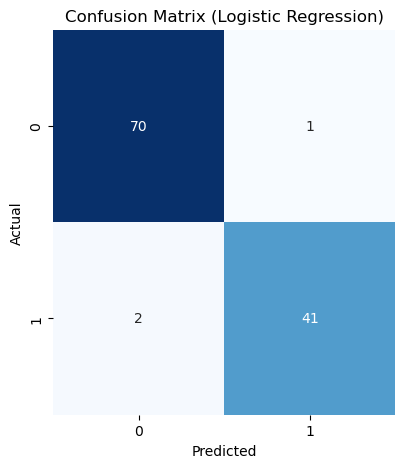

In [24]:
# Confusion Matrix and Classification Report for Logistic Regression

plt.figure(figsize=(15, 5))
lr_cm = confusion_matrix(y_test, lr_model.predict(x_test_df))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, lr_model.predict(x_test_df)))

plt.subplot(131)
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Random Forest

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_df, y_train)
rf_predictions = rf_model.predict(x_test_df)
rf_accuracy = accuracy_score(y_test, rf_predictions)


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Text(568.5163398692812, 0.5, 'Actual')

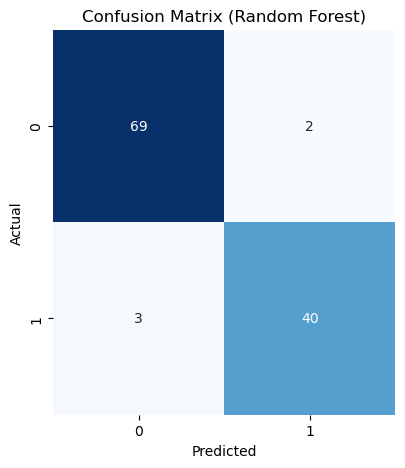

In [26]:
# Confusion Matrix and Classification Report for Random Forest

plt.figure(figsize=(15, 5))
rf_cm = confusion_matrix(y_test, rf_model.predict(x_test_df))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, rf_model.predict(x_test_df)))

plt.subplot(132)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Support Vector Machine

In [27]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train_df, y_train)
svm_predictions = svm_model.predict(x_test_df)
svm_accuracy = accuracy_score(y_test, svm_predictions)


Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(978.81045751634, 0.5, 'Actual')

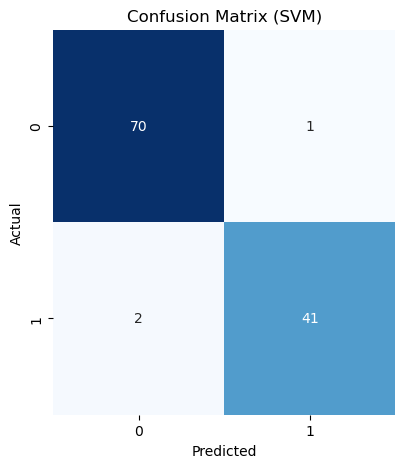

In [28]:
# Confusion Matrix and Classification Report for SVM

plt.figure(figsize=(15, 5))
svm_cm = confusion_matrix(y_test, svm_model.predict(x_test_df))
print("\nClassification Report (SVM):\n", classification_report(y_test, svm_model.predict(x_test_df)))

plt.subplot(133)
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

## Trying Grid Search For Better Results

In [29]:
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_model = LogisticRegression(random_state=42)
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(x_train_df, y_train)

# Get the best hyperparameters for Logistic Regression

best_lr_params = lr_grid_search.best_params_
best_lr_model = lr_grid_search.best_estimator_

In [30]:
# Hyperparameter tuning for Random Forest

rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(x_train_df, y_train)

# Get the best hyperparameters for Random Forest

best_rf_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_

In [31]:
# Hyperparameter tuning for Support Vector Machine (SVM)

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + [1e-3, 1e-4, 1e-5]
}
svm_model = SVC()
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(x_train_df, y_train)

# Get the best hyperparameters for SVM

best_svm_params = svm_grid_search.best_params_
best_svm_model = svm_grid_search.best_estimator_

Confusion Matrix (Logistic Regression):
 [[70  1]
 [ 2 41]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix (Random Forest):
 [[69  2]
 [ 3 40]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix (SVM):
 [[70  1]
 [ 2 41]]

Classification Report (SVM):
               precision    recall  f1-score   support

           0

Text(978.81045751634, 0.5, 'Actual')

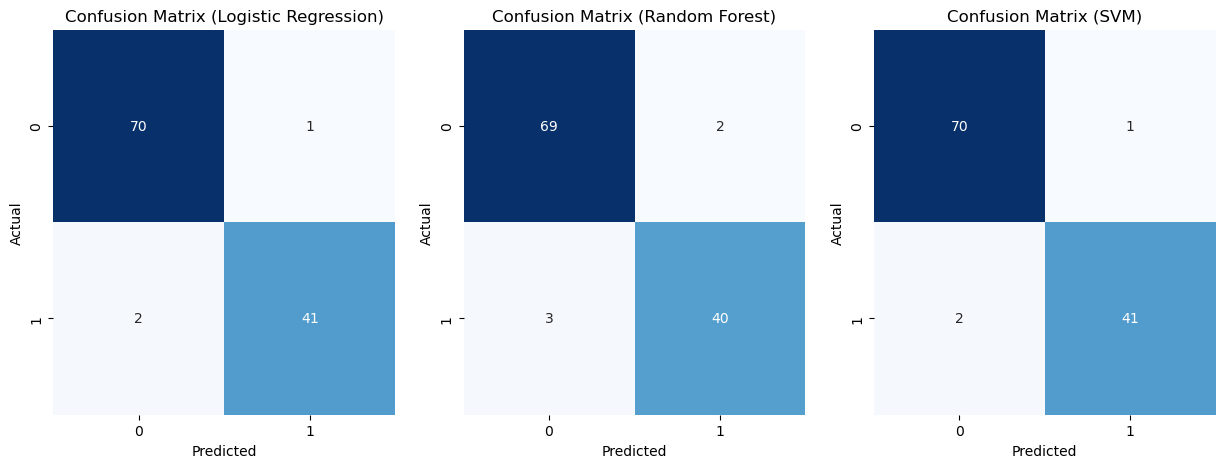

In [32]:
plt.figure(figsize=(15, 5))

# Confusion Matrix and Classification Report for Logistic Regression

lr_cm = confusion_matrix(y_test, best_lr_model.predict(x_test_df))
print("Confusion Matrix (Logistic Regression):\n", lr_cm)
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, best_lr_model.predict(x_test_df)))

plt.subplot(131)
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Confusion Matrix and Classification Report for Random Forest

rf_cm = confusion_matrix(y_test, best_rf_model.predict(x_test_df))
print("\nConfusion Matrix (Random Forest):\n", rf_cm)
print("\nClassification Report (Random Forest):\n", classification_report(y_test, best_rf_model.predict(x_test_df)))

plt.subplot(132)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Confusion Matrix and Classification Report for SVM

svm_cm = confusion_matrix(y_test, best_svm_model.predict(x_test_df))
print("\nConfusion Matrix (SVM):\n", svm_cm)
print("\nClassification Report (SVM):\n", classification_report(y_test, best_svm_model.predict(x_test_df)))

plt.subplot(133)
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
# it can be seen that grid search can not further increase the accuracy so ending the predictions here

In [33]:
# Using Logistic Regression And Support Vector Machine We are getting the maximum accuracy
# So any one algorithm can be used for future predictions and futher deployment